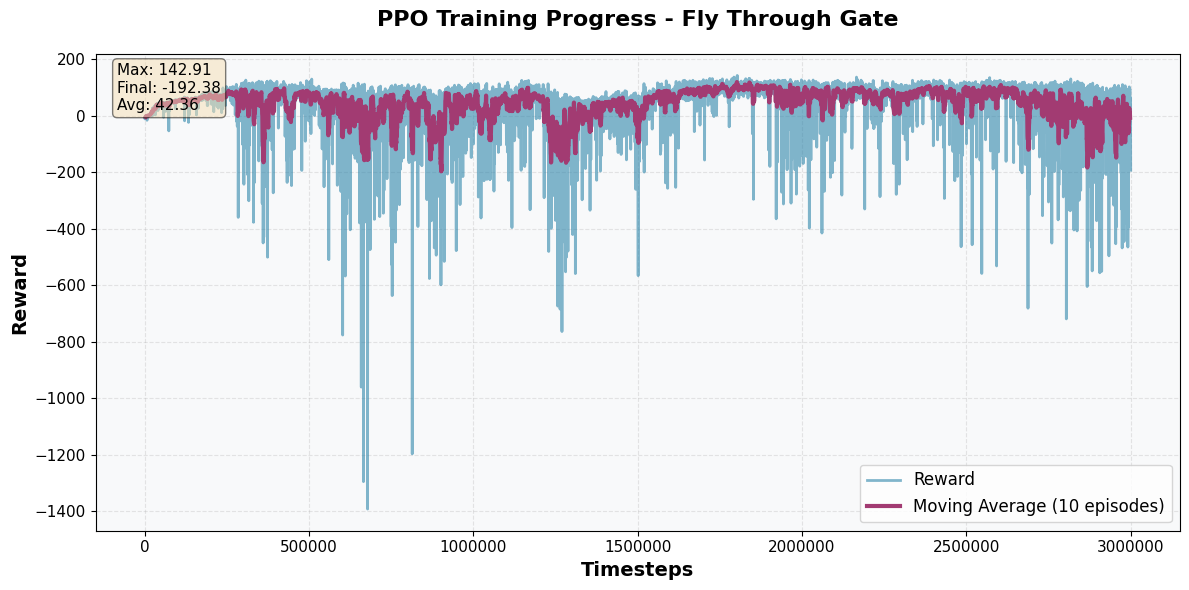

Đồ thị đã được lưu: PPO_training_results.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_csv('log_dir/PPO_log_thrugate_ppo.csv')

# Tạo figure với kích thước phù hợp cho presentation
plt.figure(figsize=(12, 6))

# Vẽ đường reward
plt.plot(df['timestep'], df['reward'], linewidth=2, color='#2E86AB', alpha=0.6, label='Reward')

# Tính moving average để làm mượt đường
window_size = 10
if len(df) >= window_size:
    moving_avg = df['reward'].rolling(window=window_size, center=True).mean()
    plt.plot(df['timestep'], moving_avg, linewidth=3, color='#A23B72', label=f'Moving Average ({window_size} episodes)')

# Tùy chỉnh đồ thị
plt.xlabel('Timesteps', fontsize=14, fontweight='bold')
plt.ylabel('Reward', fontsize=14, fontweight='bold')
plt.title('PPO Training Progress - Fly Through Gate', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right')

# Thêm thông tin thống kê
max_reward = df['reward'].max()
final_reward = df['reward'].iloc[-1]
avg_reward = df['reward'].mean()

stats_text = f'Max: {max_reward:.2f}\nFinal: {final_reward:.2f}\nAvg: {avg_reward:.2f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Làm đẹp trục
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Thêm màu nền nhẹ
ax = plt.gca()
ax.set_facecolor('#F8F9FA')

plt.tight_layout()

# Lưu file với chất lượng cao cho presentation
plt.savefig('PPO_training_results.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Đồ thị đã được lưu: PPO_training_results.png")

Dữ liệu gốc: 6250 điểm
Sau khi lọc: 5743 điểm
Reward min: -99.90, max: 142.91


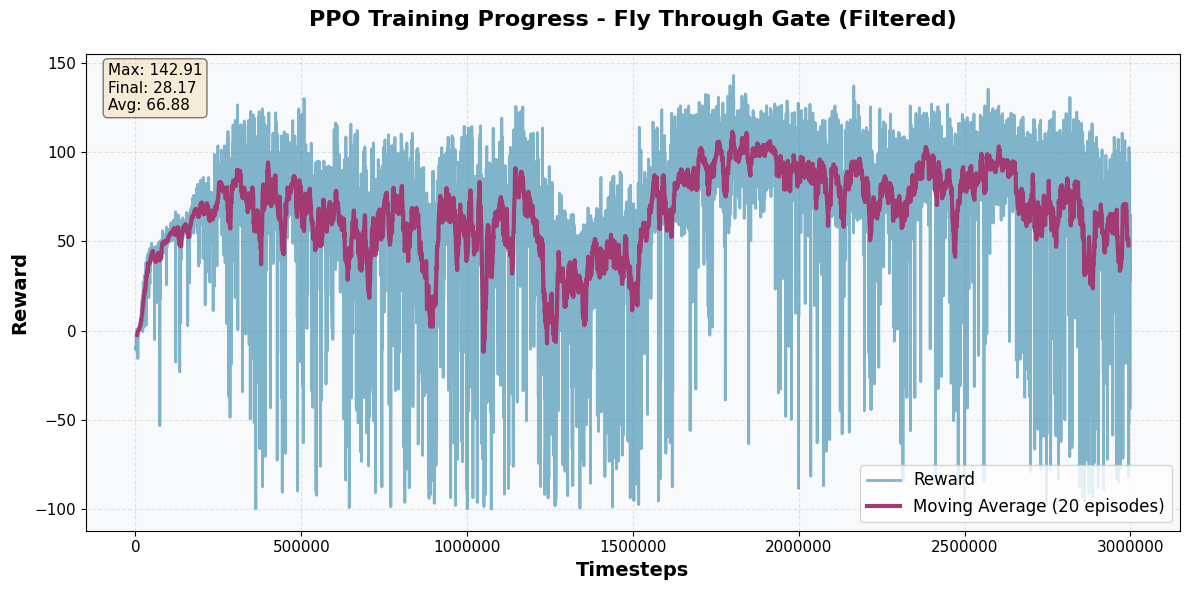


Đồ thị đã được lưu: PPO_training_results_filtered.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_csv('log_dir/PPO_log_thrugate_ppo.csv')

# Lọc bỏ outliers (giữ lại data trong khoảng hợp lý)
# Phương pháp 1: Loại bỏ những giá trị quá âm (ví dụ < -5)
df_filtered = df[df['reward'] > -100].copy()

# Hoặc Phương pháp 2: Sử dụng IQR để loại outliers
Q1 = df['reward'].quantile(0.25)
Q3 = df['reward'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# df_filtered = df[(df['reward'] >= lower_bound) & (df['reward'] <= upper_bound)].copy()

print(f"Dữ liệu gốc: {len(df)} điểm")
print(f"Sau khi lọc: {len(df_filtered)} điểm")
print(f"Reward min: {df_filtered['reward'].min():.2f}, max: {df_filtered['reward'].max():.2f}")

# Vẽ đồ thị
plt.figure(figsize=(12, 6))

# Vẽ đường reward
plt.plot(df_filtered['timestep'], df_filtered['reward'], 
         linewidth=2, color='#2E86AB', alpha=0.6, label='Reward')

# Moving average
window_size = 20
if len(df_filtered) >= window_size:
    moving_avg = df_filtered['reward'].rolling(window=window_size, center=True).mean()
    plt.plot(df_filtered['timestep'], moving_avg, 
             linewidth=3, color='#A23B72', label=f'Moving Average ({window_size} episodes)')

plt.xlabel('Timesteps', fontsize=14, fontweight='bold')
plt.ylabel('Reward', fontsize=14, fontweight='bold')
plt.title('PPO Training Progress - Fly Through Gate (Filtered)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right')

max_reward = df_filtered['reward'].max()
final_reward = df_filtered['reward'].iloc[-1]
avg_reward = df_filtered['reward'].mean()

stats_text = f'Max: {max_reward:.2f}\nFinal: {final_reward:.2f}\nAvg: {avg_reward:.2f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

ax = plt.gca()
ax.set_facecolor('#F8F9FA')

plt.tight_layout()
plt.savefig('PPO_training_results_filtered.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nĐồ thị đã được lưu: PPO_training_results_filtered.png")